In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

In [2]:
pdo = pd.read_csv('raw-data_PDO.csv')

In [3]:
pdo = pdo.set_index('YEAR').unstack().reset_index()

In [4]:
pdo['level_0'].unique()

array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'], dtype=object)

In [5]:
pdo_clean = pdo.replace({'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12})

In [6]:
pdo_clean.head()

,level_0,YEAR,0
0,1,1900,0.04
1,1,1901,0.79
2,1,1902,0.82
3,1,1903,0.86
4,1,1904,0.63


In [7]:
pdo_clean.columns = ['month','YEAR','PDO']

In [8]:
pdo_clean = pdo_clean[pdo_clean['YEAR'].between(1951,2010)]

In [9]:
pdo_clean['TIME'] =  pd.to_datetime((pdo_clean['YEAR']*100+pdo_clean['month']).apply(str),format='%Y%m')

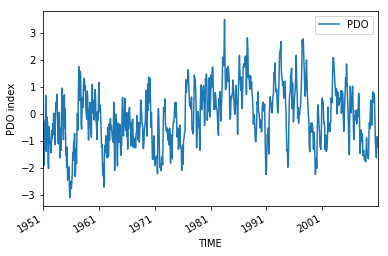

In [10]:
pdo_clean.plot('TIME','PDO')
plt.ylabel('PDO index')
plt.show()

In [11]:
pdo_clean.to_csv('data_pdo.csv',index=False)

In [109]:
pdo_test = pdo_clean[pdo_clean['month'].between(7,10)].groupby('YEAR')['PDO'].mean().reset_index()

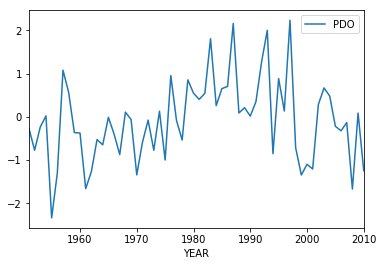

In [110]:
pdo_test.plot('YEAR','PDO')
plt.show()

In [86]:
pdo_test.head()

,YEAR,PDO,norm_pdo
0,1951,-0.2675,-0.198098
1,1952,-0.7725,-0.729751
2,1953,-0.2325,-0.161251
3,1954,0.0225,0.107208
4,1955,-2.3375,-2.377350


In [102]:
pdo_mean = pdo_test['PDO'].mean()
pdo_std = pdo_test['PDO'].std()

In [103]:
pdo_test['norm_pdo'] = (pdo_test['PDO']-pdo_mean)/pdo_std

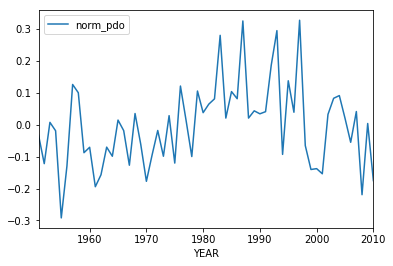

In [106]:
pdo_test.plot('YEAR','norm_pdo')
plt.show()

In [105]:
pdo_test['norm_pdo'] = normalize(pdo_test['PDO'][np.newaxis,:])[0]